# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [1]:
! pip install mysql-connector-python

In [2]:
# ! pip list | grep mysql-connector-python
! pip list | findstr mysql-connector-python

mysql-connector-python            9.0.0


In [3]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime

2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [9]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

In [10]:
cursor = con.cursor()

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [11]:
sql = """
select max(hire_date) as "Max date",min(hire_date) as "Min date" from employees
"""

cursor.execute(sql)



In [12]:
cursor.fetchall()

[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

In [13]:
cursor.close()

True

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [14]:
import pandas as pd

In [15]:
cursor = con.cursor()

In [16]:
sql = """
SELECT s.emp_no, e.first_name, e.last_name, s.salary, s.from_date, s.to_date
FROM salaries s
JOIN employees e ON s.emp_no = e.emp_no
WHERE (s.to_date, s.from_date) = (SELECT MAX(s2.to_date), MAX(s2.from_date)
                                  FROM salaries s2
                                  WHERE s2.emp_no = s.emp_no)
ORDER BY s.emp_no;
"""

In [17]:
cursor.execute(sql)
field_names = [i[0] for i in cursor.description]
res = pd.DataFrame(cursor.fetchall(), columns =field_names)

In [26]:
res.head()

,emp_no,first_name,last_name,salary,from_date,to_date
0,10001,Georgi,Facello,88958,2002-06-22,9999-01-01
1,10002,Bezalel,Simmel,72527,2001-08-02,9999-01-01
2,10003,Parto,Bamford,43311,2001-12-01,9999-01-01
3,10004,Chirstian,Koblick,74057,2001-11-27,9999-01-01
4,10005,Kyoichi,Maliniak,94692,2001-09-09,9999-01-01


In [19]:
idx = pd.Index(res.columns)
idx

Index(['emp_no', 'first_name', 'last_name', 'salary', 'from_date', 'to_date'], dtype='object')

In [20]:
res.shape

(300024, 6)

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1lNvzbAebtkj3C2v-I5AE6HkMH8MTI1kA)

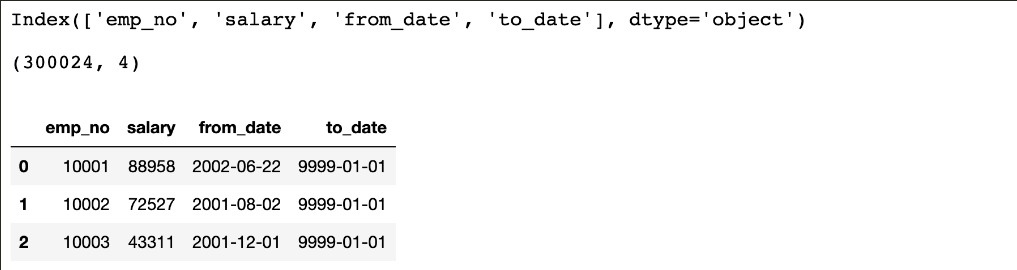

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [47]:
from datetime import date

# Підраховуємо кількість значень, рівних '9999-01-01'
count_9999 = res[res['to_date'] == date(9999, 1, 1)].shape[0]
count_not_9999 = res[res['to_date'] != date(9999, 1, 1)].shape[0]
print(f"Кількість значень '9999-01-01': {count_9999}")
print(f"Кількість значень НЕ рівних '9999-01-01': {count_not_9999}")

Кількість значень '9999-01-01': 240124
Кількість значень НЕ рівних '9999-01-01': 59900


6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

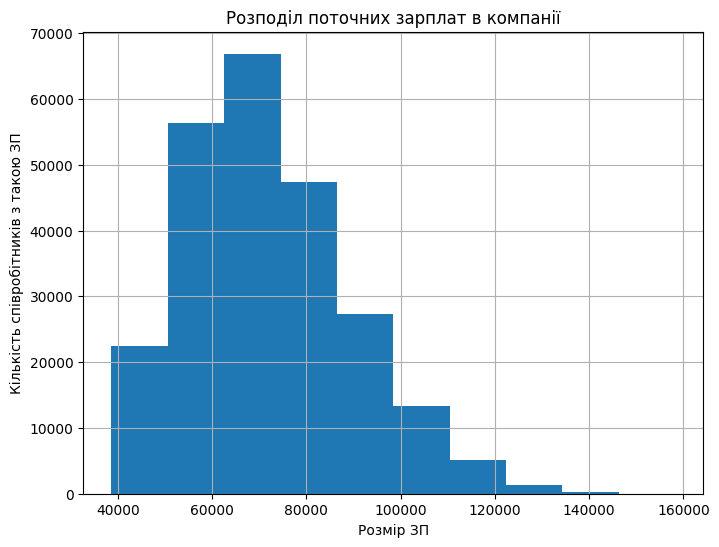

In [55]:
import matplotlib.pyplot as plt
df_salaries = res[res['to_date'] == date(9999, 1, 1)]

plt.figure(figsize=(8, 6))
plt.hist(df_salaries['salary'], bins=10)
plt.title("Розподіл поточних зарплат в компанії")
plt.xlabel("Розмір ЗП")
plt.ylabel("Кількість співробітників з такою ЗП")
plt.grid(True)
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1j8MHLC1E0revbQLM9B0UJs6tVEgoWhmK)
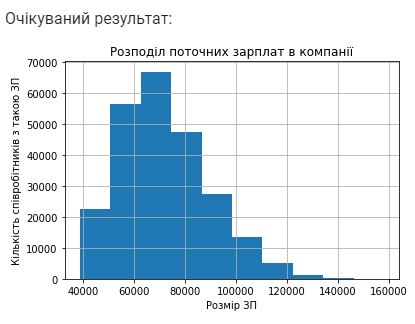

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [56]:
con.close()